In [1]:
import sklearn as skl
import sklearn.preprocessing as skprep
import sklearn.metrics as skmet
import sklearn.linear_model as sklin
import sklearn.model_selection as skms
import sklearn.pipeline as skpipe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
dataset=load_iris()
new=pd.DataFrame(dataset.data,columns=dataset.feature_names)
new['class']=pd.Series(dataset.target)
new.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(url, names = attributes)
df.columns = attributes

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [7]:
print(le.inverse_transform(df['class']))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [8]:
x=df.drop(columns=['class'])
y=df['class']
x_train,x_test,y_train,y_test=skms.train_test_split(x,y,test_size=0.5)

In [9]:
LR=sklin.LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [10]:
print("Accuracy: ", LR.score(x_test, y_test) * 100)
LR_pred=LR.predict(x_test)

Accuracy:  97.33333333333334


In [11]:
sgdc=sklin.SGDClassifier()
sgdc.fit(x_train,y_train)

SGDClassifier()

In [12]:
print("Accuracy: ", sgdc.score(x_test, y_test) * 100)
sgdc_pred=sgdc.predict(x_test)

Accuracy:  62.66666666666667


In [13]:
acLR=LR_pred-y_test
acSGD=sgdc_pred-y_test
pred_data={'LR':LR_pred,'SGD':sgdc_pred,'Y_test':y_test,'LR_Acc':acLR,'SGD_Acc':acSGD}

new_df=pd.DataFrame(data=pred_data)
new_df=new_df.reset_index()
new_df.head(100)


,index,LR,SGD,Y_test,LR_Acc,SGD_Acc
0,125,2,2,2,0,0
1,16,0,0,0,0,0
2,17,0,0,0,0,0
3,114,2,2,2,0,0
4,11,0,0,0,0,0
...,...,...,...,...,...,...
70,82,1,0,1,0,-1
71,108,2,2,2,0,0
72,139,2,2,2,0,0
73,93,1,0,1,0,-1


In [14]:
new_df.loc[new_df['LR_Acc'] != 0]

,index,LR,SGD,Y_test,LR_Acc,SGD_Acc
29,83,2,2,1,1,1
38,77,2,2,1,1,1


In [15]:
new_df.loc[new_df['SGD_Acc'] != 0]

,index,LR,SGD,Y_test,LR_Acc,SGD_Acc
10,73,1,0,1,0,-1
13,95,1,0,1,0,-1
15,87,1,0,1,0,-1
16,98,1,0,1,0,-1
21,64,1,0,1,0,-1
22,84,1,2,1,0,1
23,57,1,0,1,0,-1
28,76,1,0,1,0,-1
29,83,2,2,1,1,1
30,96,1,0,1,0,-1


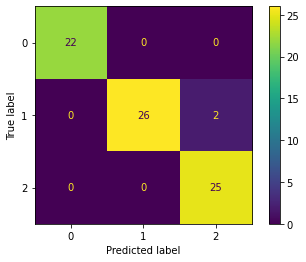

In [22]:
disp=skmet.ConfusionMatrixDisplay.from_predictions(y_test,LR_pred)
plt.show()

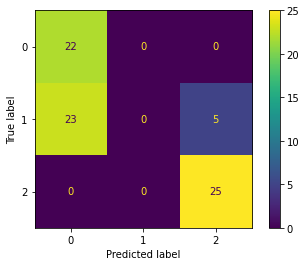

In [23]:
disp2=skmet.ConfusionMatrixDisplay.from_predictions(y_test,sgdc_pred)
plt.show()